In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.get_option("display.max_columns")
pd.get_option("display.max_rows")

In [ ]:
missing_values = ["n/a", "na", "--"]

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/cleaned_dataset.csv', na_values = missing_values)


In [ ]:

raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/Combined COVID-19 Questionnaire data Marnewick August 2022.xlsx - COVID19 RAQ with Results.csv', na_values = missing_values)


In [ ]:
raw.head(3)

,Participant Number,Visit,Age of Participant,Temperature of Participant (°C),"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N",Does the participant have a cough that recently started? Answer: Y/N,Does the participant have a sore throat or pain when swallowing? Answer: Y/N,Does the participant experience recent headaches or body pains? Answer: Y/N,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary.,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N","If so, please provide the date.",Does the participant have any known COVID-19 comorbidities? Answer: Y/N,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N,"If not, does the participant intend to get vaccinated? Answer: Y/N",COVID-19 Screening Results,NOTE: Not all participants received a COVID screening test. The time when the Baseline sample and the Intervention sample was taken is on next sheet of this workbook.
0,1,Baseline,NaN,36.4,N,N,N,N,N,N,N,N,N,NaN,N,Y,NaN,negative,NaN
1,NaN,Intervention,59.0,36.5,N,N,N,N,N,NaN,N,Y,Y,Jun-21,N,Y,NaN,positive,NaN
2,2,Initial Screening,NaN,36.3,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,NaN,NaN


In [ ]:
L=list(raw['Visit'])

In [ ]:
L.count('Baseline')

329

In [ ]:
raw['Participant Number'].fillna(method='ffill',limit=3, inplace=True)

In [ ]:
raw.head(10)

,Participant Number,Visit,Age of Participant,Temperature of Participant (°C),"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N",Does the participant have a cough that recently started? Answer: Y/N,Does the participant have a sore throat or pain when swallowing? Answer: Y/N,Does the participant experience recent headaches or body pains? Answer: Y/N,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary.,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N","If so, please provide the date.",Does the participant have any known COVID-19 comorbidities? Answer: Y/N,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N,"If not, does the participant intend to get vaccinated? Answer: Y/N",COVID-19 Screening Results,NOTE: Not all participants received a COVID screening test. The time when the Baseline sample and the Intervention sample was taken is on next sheet of this workbook.
0,1,Baseline,NaN,36.4,N,N,N,N,N,N,N,N,N,NaN,N,Y,NaN,negative,NaN
1,1,Intervention,59.0,36.5,N,N,N,N,N,NaN,N,Y,Y,Jun-21,N,Y,NaN,positive,NaN
2,2,Initial Screening,NaN,36.3,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,NaN,NaN
3,2,Baseline,NaN,36,N,N,N,N,N,NaN,N,Y,N,NaN,N,Y,NaN,positive,NaN
4,2,Intervention,58.0,36.4,N,N,N,N,N,N,N,N,N,NaN,N,Y,NaN,NS=NR,NaN
5,8,Baseline,NaN,36.4,N,N,N,N,N,N,N,Y,Y,3-Aug-21,Y,Y,NaN,positive,NaN
6,8,Intervention,53.0,36.1,N,N,N,N,N,N,N,Y,N,NaN,Y,Y,NaN,negative,NaN
7,9,Initial Screening,NaN,36.3,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,NaN,NaN
8,9,Baseline,NaN,36.2,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,negative,NaN
9,9,Intervention,58.0,36.1,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,negative,NaN


In [ ]:
# df.columns[df.isnull().any()]


In [ ]:
L=[]
L_less=[]
for i in df.columns:
  if((df[i].isnull().sum())<=(0.3*(df.shape[0]))):
    L.append(i)
  else:
    L_less.append(i)

In [ ]:
# These columns have more than 30% missing values
len(L_less)

22

In [ ]:
df=df[L]
df=df.iloc[:,1:]

In [ ]:
df.head()

,NUMBER,BP_Average,Weight,Height (m),Waist circumference,BMI_x,Glucose,Chol,HB,Gender (M=1; F=2)_x,Age,"First Lang (Afr=1, Eng=2, Xho=3)",Second Lang,Marital status,Occupation,Hazardous exposure,HLE,Smoking (No=1; Yes=2; prev=3),Physical activity (Yes=1; No=2),PA/week,PA level,HPT (No=1; Yes=2; Unsure=3),Low/high Blood sugar (No=1; Yes=2; Unsure=3),Fam hx CVD (No=1; Yes=2; Unsure=3),High Chol,Alcohol (No=1; Yes=2),Kidney problems (No=1; Yes=2),Liver problems,Screening date,Gender (M=1; F=2)_y,VISIT 2 (Baseline),VISIT 3 (intervention),BMI_y,Participant Number,Visit_b,Age of Participant_b,Temperature of Participant (°C)_b,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b",Does the participant have a cough that recently started? Answer: Y/N_b,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_b,Does the participant experience recent headaches or body pains? Answer: Y/N_b,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_b,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_b,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_b,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._b,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b,COVID-19 Screening Results_b,Visit_i,Temperature of Participant (°C)_i,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i",Does the participant have a cough that recently started? Answer: Y/N_i,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i,Does the participant experience recent headaches or body pains? Answer: Y/N_i,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_i,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._i,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_i",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_i,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_i,COVID-19 Screening Results_i
0,1,High Normal,63.1,1.67,85.0,22.63,3.5,High,16.3,2,57,2,1,3,Researcher Scientist,Yes,4,3.0,1,3.0,2.0,1,1,2,2.0,2,1,1,02/10/2019,2.0,22/11/2021,16/2/2022,22.6,1,Baseline,59.0,36.4,N,N,N,N,N,N,N,N,N,N,negative,Intervention,36.5,N,N,N,N,N,NaN,N,Y,Y,N,Y,positive
1,2,High Normal,67.0,1.67,80.0,24.02,4.8,5.92,15.6,2,55,2,1,4,librarian,No,3,2.0,1,2.0,1.0,1,1,1,2.0,2,1,1,02-10-2019,2.0,24/11/2021,16/2/2022,24.0,2,Baseline,58.0,36,N,N,N,N,N,NaN,N,Y,N,N,positive,Intervention,36.4,N,N,N,N,N,N,N,N,N,N,Y,NS=NR
2,8,High Normal,95.3,1.71,111.5,32.59,4.8,Hi,13.2,1,51,2,1,3,Assistant Libarian,No,3,3.0,2,NaN,NaN,2,1,2,2.0,2,1,1,02/10/2019,1.0,11/11/2021,31/1/2022,32.6,8,Baseline,53.0,36.4,N,N,N,N,N,N,N,Y,Y,Y,positive,Intervention,36.1,N,N,N,N,N,N,N,Y,N,Y,Y,negative
3,9,Normal,54.0,1.57,68.0,21.91,3.8,5.63,9.3,2,56,2,1,3,Administrator,No,3,1.0,1,2.0,1.0,1,1,2,1.0,1,1,1,03-10-2019,2.0,12/11/2021,4/2/2022,21.9,9,Baseline,58.0,36.2,N,N,N,N,N,N,N,Y,N,N,negative,Intervention,36.1,N,N,N,N,N,N,N,Y,N,N,Y,negative
4,11,Normal,87.6,1.64,96.0,32.77,3.3,6.87,13.5,2,30,2,1,1,Student,No,3,1.0,2

In [ ]:
df.iloc[:2,45:]

,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b,COVID-19 Screening Results_b,Visit_i,Temperature of Participant (°C)_i,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i",Does the participant have a cough that recently started? Answer: Y/N_i,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i,Does the participant experience recent headaches or body pains? Answer: Y/N_i,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_i,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._i,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_i",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_i,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_i,COVID-19 Screening Results_i
0,N,N,negative,Intervention,36.5,N,N,N,N,N,NaN,N,Y,Y,N,Y,positive
1,N,N,positive,Intervention,36.4,N,N,N,N,N,N,N,N,N,N,Y,NS=NR


In [ ]:
df.iloc[:2,45:].columns

Index(['Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b',
       'Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b',
       'COVID-19 Screening Results_b', 'Visit_i',
       'Temperature of Participant (°C)_i',
       'Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i',
       'Does the participant have a cough that recently started? Answer: Y/N_i',
       'Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i',
       'Does the participant experience recent headaches or body pains? Answer: Y/N_i',
       'Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i',
       'Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i',
       'Has the participant recently been in close contact 

In [ ]:
def check_Obesity(s):
  if(s<18.5):
    return 'Under Weight'
  elif(s>=18.5 and s<25):
    return 'Normal'
  elif(s>=25 and s<30):
    return 'Overweight'
  elif(s>=30):
    return 'Obese'


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor


In [ ]:
numeric_data=df.select_dtypes(include=np.number)


In [ ]:
non_numeric=df.select_dtypes(include = ['object'])


In [ ]:
numeric_data.shape

(257, 23)

In [ ]:
non_numeric.shape

(257, 39)

In [ ]:
estimator = XGBRegressor()
imp = IterativeImputer(max_iter=10, random_state=0, estimator=estimator)
imp.fit(numeric_data)
imputed_numeric=np.round(imp.transform(numeric_data))
numeric_data=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)

In [ ]:
numeric_data.columns

Index(['NUMBER', 'Weight', 'Height (m)', 'Waist circumference', 'BMI_x', 'HB',
       'Gender (M=1; F=2)_x', 'Age', 'HLE', 'Smoking (No=1; Yes=2; prev=3)',
       'Physical activity (Yes=1; No=2)', 'PA/week', 'PA level',
       'HPT (No=1; Yes=2; Unsure=3)',
       'Low/high  Blood sugar (No=1; Yes=2; Unsure=3)',
       'Fam hx CVD (No=1; Yes=2; Unsure=3)', 'High Chol',
       'Kidney problems (No=1; Yes=2)', 'Liver problems',
       'Gender (M=1; F=2)_y', 'BMI_y', 'Participant Number',
       'Age of Participant_b'],
      dtype='object')

In [ ]:
numeric_data.describe()

,NUMBER,Weight,Height (m),Waist circumference,BMI_x,HB,Gender (M=1; F=2)_x,Age,HLE,Smoking (No=1; Yes=2; prev=3),Physical activity (Yes=1; No=2),PA/week,PA level,HPT (No=1; Yes=2; Unsure=3),Low/high Blood sugar (No=1; Yes=2; Unsure=3),Fam hx CVD (No=1; Yes=2; Unsure=3),High Chol,Kidney problems (No=1; Yes=2),Liver problems,Gender (M=1; F=2)_y,BMI_y,Participant Number,Age of Participant_b
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,457.533074,80.961089,1.984436,98.291829,30.494163,13.996109,1.747082,46.182879,2.252918,1.595331,1.264591,1.778210,1.233463,1.178988,1.190661,1.638132,1.381323,1.015564,1.007782,1.747082,30.517510,457.533074,46.828794
std,202.815514,19.225798,0.124023,15.055251,7.367645,2.406856,0.435533,10.624339,0.663090,0.733981,0.441976,0.766378,0.423860,0.536797,0.571653,0.577394,0.686449,0.176088,0.124757,0.435533,7.364975,202.815514,10.605583
min,1.000000,43.000000,1.000000,62.000000,16.000000,7.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,29.000000
25%,332.000000,67.000000,2.000000,87.000000,25.000000,12.000000,1.000000,37.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,332.000000,37.000000
50%,514.000000,79.000000,2.000000,97.000000,29.000000,14.000000,2.000000,45.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,30.000000,514.000000,46.000000
75%,630.000000,92.000000,2.000000,109.000000,35.000000,16.000000,2.000000,55.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,35.000000,630.000000,55.000000
max,721.000000,178.000000,2.000000,149.000000,59.000000,21.000000,2.000000,77.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,59.000000,721.000000,73.000000


In [ ]:
non_numeric=non_numeric.fillna(method="pad", limit=2)
non_numeric=non_numeric.fillna(method="bfill", limit=22)

In [ ]:
non_numeric.columns[non_numeric.isnull().any()]


Index(['Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b',
       'Does the participant have a cough that recently started? Answer: Y/N_b',
       'Does the participant have a sore throat or pain when swallowing? Answer: Y/N_b',
       'Does the participant experience recent headaches or body pains? Answer: Y/N_b',
       'Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_b',
       'Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_b',
       'Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_b',
       'Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._b',
       'Has the participant eve

One approach to imputing categorical features is to replace missing values with the most common class. You can do with by taking the index of the most common feature given in Pandas’ value_counts function.

### for each column, get value counts in decreasing order and take the index (value) of most common class


In [ ]:
non_numeric = non_numeric.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [ ]:
non_numeric.columns[non_numeric.isnull().any()]


Index([], dtype='object')

In [ ]:
non_numeric.head()

,BP_Average,Glucose,Chol,"First Lang (Afr=1, Eng=2, Xho=3)",Second Lang,Marital status,Occupation,Hazardous exposure,Alcohol (No=1; Yes=2),Screening date,VISIT 2 (Baseline),VISIT 3 (intervention),Visit_b,Temperature of Participant (°C)_b,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b",Does the participant have a cough that recently started? Answer: Y/N_b,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_b,Does the participant experience recent headaches or body pains? Answer: Y/N_b,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_b,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_b,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_b,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._b,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b,COVID-19 Screening Results_b,Visit_i,Temperature of Participant (°C)_i,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i",Does the participant have a cough that recently started? Answer: Y/N_i,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i,Does the participant experience recent headaches or body pains? Answer: Y/N_i,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_i,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._i,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_i",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_i,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_i,COVID-19 Screening Results_i
0,High Normal,3.5,High,2,1,3,Researcher Scientist,Yes,2,02/10/2019,22/11/2021,16/2/2022,Baseline,36.4,N,N,N,N,N,N,N,N,N,N,negative,Intervention,36.5,N,N,N,N,N,N,N,Y,Y,N,Y,positive
1,High Normal,4.8,5.92,2,1,4,librarian,No,2,02-10-2019,24/11/2021,16/2/2022,Baseline,36,N,N,N,N,N,N,N,Y,N,N,positive,Intervention,36.4,N,N,N,N,N,N,N,N,N,N,Y,NS=NR
2,High Normal,4.8,Hi,2,1,3,Assistant Libarian,No,2,02/10/2019,11/11/2021,31/1/2022,Baseline,36.4,N,N,N,N,N,N,N,Y,Y,Y,positive,Intervention,36.1,N,N,N,N,N,N,N,Y,N,Y,Y,negative
3,Normal,3.8,5.63,2,1,3,Administrator,No,1,03-10-2019,12/11/2021,4/2/2022,Baseline,36.2,N,N,N,N,N,N,N,Y,N,N,negative,Intervention,36.1,N,N,N,N,N,N,N,Y,N,N,Y,negative
4,Normal,3.3,6.87,2,1,1,Student,No,2,03-10-2019,18/11/2021,11/2/2022,Baseline,36.8,N,N,N,N,N,N,N,Y,Y,N,positive,Intervention,36.5,N,N,N,N,N,N,N,Y,Y,N,Y,negative


In [ ]:
cnames=list(non_numeric.select_dtypes(exclude=['object']).columns)


In [ ]:
import datetime


In [ ]:
non_numeric.drop('Screening date', axis=1, inplace=True)

In [ ]:
non_numeric.iloc[:,21].value_counts()

N    223
Y     34
Name: Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b, dtype: int64

In [ ]:
raw['Visit'].value_counts()

Baseline             329
Intervention         319
Initial Screening    305
Name: Visit, dtype: int64

Total of participants in the first data set

In [ ]:
len(set(raw['Participant Number']))

418

How many people participated in Both

In [ ]:
raw_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/Combined COVID-19 Questionnaire data Marnewick August 2022.xlsx - Sheet1.csv', na_values = missing_values)


In [ ]:

raw_2.head()

,NUMBER,Screening date,Gender (M=1; F=2),VISIT 2 (Baseline),VISIT 3 (intervention),BMI
0,1,02/10/2019,2,22/11/2021,16/2/2022,22.6
1,2,02-10-2019,2,24/11/2021,16/2/2022,24.0
2,8,02/10/2019,1,11/11/2021,31/1/2022,32.6
3,9,03-10-2019,2,12/11/2021,4/2/2022,21.9
4,11,03-10-2019,2,18/11/2021,11/2/2022,32.8


In [ ]:
len(set(raw_2['NUMBER']))

257

How many people have breakthrough infection on Both

In [ ]:
## People who have breakthrough on both
break_through_both=[]
for i in range(len(non_numeric)) :
  if((non_numeric.iloc[i, 23] in ['positive', 'positive  *']) and (non_numeric.iloc[i, 36]=='Y' and non_numeric.iloc[i, 37] in ['positive', 'positive  *'])):
    break_through_both.append('Y')
  # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
    #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
  else:
    break_through_both.append('N')
# Total number of Re_infection after being vaccinated

In [ ]:
break_through_both.count('Y')

45

In [ ]:
# ## People who have breakthrough infection and re-infection
# break_through=[]
# for i in range(len(df)) :
#   if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *'])):
#     break_through.append('Y')
#   # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
#     #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):

#   else:
#     break_through.append('N')
# # Total number of Re_infection after being vaccinated


In [ ]:
len(break_through_both)

257

In [ ]:
# re_infected=df.loc[df['NUMBER'].isin(who_are_these)]
# re_infected.loc[:,'BMI_x']
Weight_range=numeric_data['BMI_x'].apply(check_Obesity)
non_numeric.insert(6,column='Weight_Category', value=Weight_range)

In [ ]:
def occupation(s):
  if(s.lower() in "unemployed"):
    return 'unemployed'
  else:
    return 'employed'

In [ ]:
L=non_numeric['Occupation'].apply(occupation)

In [ ]:
non_numeric.drop('Occupation', axis=1, inplace=True)

In [ ]:
non_numeric.insert(7,column='Occupation', value=L)

In [ ]:
non_numeric['Occupation'].value_counts()

employed      193
unemployed     64
Name: Occupation, dtype: int64

In [ ]:
non_numeric['break_through']=break_through_both
non_numeric['break_through'].value_counts()


N    212
Y     45
Name: break_through, dtype: int64

In [ ]:
y=non_numeric['break_through']
non_numeric=non_numeric.drop('break_through', axis=1)
y.value_counts()

N    212
Y     45
Name: break_through, dtype: int64

In [ ]:
non_numeric.columns

Index(['BP_Average', 'Glucose', 'Chol', 'First Lang (Afr=1, Eng=2,  Xho=3)',
       'Second Lang', 'Marital status', 'Weight_Category', 'Occupation',
       'Hazardous exposure', 'Alcohol  (No=1; Yes=2)', 'VISIT 2 (Baseline)',
       'VISIT 3 (intervention)', 'Visit_b',
       'Temperature of Participant (°C)_b',
       'Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b',
       'Does the participant have a cough that recently started? Answer: Y/N_b',
       'Does the participant have a sore throat or pain when swallowing? Answer: Y/N_b',
       'Does the participant experience recent headaches or body pains? Answer: Y/N_b',
       'Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_b',
       'Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_b',
       'Has the participan

In [ ]:
numeric_data.columns

Index(['NUMBER', 'Weight', 'Height (m)', 'Waist circumference', 'BMI_x', 'HB',
       'Gender (M=1; F=2)_x', 'Age', 'HLE', 'Smoking (No=1; Yes=2; prev=3)',
       'Physical activity (Yes=1; No=2)', 'PA/week', 'PA level',
       'HPT (No=1; Yes=2; Unsure=3)',
       'Low/high  Blood sugar (No=1; Yes=2; Unsure=3)',
       'Fam hx CVD (No=1; Yes=2; Unsure=3)', 'High Chol',
       'Kidney problems (No=1; Yes=2)', 'Liver problems',
       'Gender (M=1; F=2)_y', 'BMI_y', 'Participant Number',
       'Age of Participant_b'],
      dtype='object')

In [ ]:
non_numeric['COVID-19 Screening Results_i'].value_counts()

negative        71
positive        68
NS=NR           55
negative *      44
positive *      14
-                2
inconclusive     1
positive  *      1
NS=NR            1
Name: COVID-19 Screening Results_i, dtype: int64

In [ ]:
numeric_data['Liver problems'].value_counts()

1.0    256
3.0      1
Name: Liver problems, dtype: int64

In [ ]:
raw_2.columns

Index(['NUMBER', 'Screening date', 'Gender (M=1; F=2)', 'VISIT 2 (Baseline)',
       'VISIT 3 (intervention)', 'BMI'],
      dtype='object')

In [ ]:
from pandas.core.dtypes.cast import coerce_indexer_dtype
pd.to_numeric(non_numeric['Temperature of Participant (°C)_i'], errors='coerce').describe()

count    251.000000
mean      36.312351
std        0.377739
min       35.100000
25%       36.100000
50%       36.300000
75%       36.500000
max       37.800000
Name: Temperature of Participant (°C)_i, dtype: float64

In [ ]:
!pip install category_encoders



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce


In [ ]:
loo_encoder = ce.LeaveOneOutEncoder(cols=non_numeric.iloc[:,:], sigma=0.05)


In [ ]:
y,_=pd.factorize(y)

In [ ]:
loo_encoder.fit(non_numeric, y)
non_numeric_encoded = loo_encoder.transform(non_numeric)



In [ ]:
df['break_through']=y
y=df['break_through']

In [ ]:
y.value_counts()

0    212
1     45
Name: break_through, dtype: int64

In [ ]:
X=pd.concat([numeric_data,non_numeric_encoded], axis=1)

In [ ]:
X=X.iloc[:,1:]

In [ ]:
X.columns

Index(['Weight', 'Height (m)', 'Waist circumference', 'BMI_x', 'HB',
       'Gender (M=1; F=2)_x', 'Age', 'HLE', 'Smoking (No=1; Yes=2; prev=3)',
       'Physical activity (Yes=1; No=2)', 'PA/week', 'PA level',
       'HPT (No=1; Yes=2; Unsure=3)',
       'Low/high  Blood sugar (No=1; Yes=2; Unsure=3)',
       'Fam hx CVD (No=1; Yes=2; Unsure=3)', 'High Chol',
       'Kidney problems (No=1; Yes=2)', 'Liver problems',
       'Gender (M=1; F=2)_y', 'BMI_y', 'Participant Number',
       'Age of Participant_b', 'BP_Average', 'Glucose', 'Chol',
       'First Lang (Afr=1, Eng=2,  Xho=3)', 'Second Lang', 'Marital status',
       'Weight_Category', 'Occupation', 'Hazardous exposure',
       'Alcohol  (No=1; Yes=2)', 'VISIT 2 (Baseline)',
       'VISIT 3 (intervention)', 'Visit_b',
       'Temperature of Participant (°C)_b',
       'Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b',
    

In [ ]:
features=list(X.columns)

In [ ]:
actual_names=['Weight','Height','Waist_circumference','BMI_x','HB','Gender(M=1,F=2)',
              'Age','HLE','Smoking','Physical_activity','PA/week','PA_level','HPT',
              'Low/high_Blood_sugar','Fam_hx_CVD','High_Chol','Kidney_problems',
              'Liver_problems','Gender','BMI_y','Participant_Number','Age of Participant_b',
              'BP','Glucose_Level','Chol','First_Lang','Second_Lang','Marital_status',
              'Weight_Category','Occupation','Hazardous_exposure','Alcohol','VISIT_baseline','VISIT_Intervention',
              'Visit_b','Temp_b','Symp_Cold','Symp_Cough','Symp_Sore_throat','Symp_Headache',
              'breathlessness','taste_Smell','Close_to_Someonewith_Covid','IS_info_Accurate',
              'Positive_Before','COVID-19_comorbidities',
              'COVID-19_Screening_Results_b','Visit_i','Temp_i',
              'Symp_Cold_i','Symp_Cough_i','Symp_Sore_throat_i','Symp_Headache_i',
              'breathlessness_i','taste_Smell_i','Close_to_Someonewith_Covid_i','IS_info_Accurate_i',
              'Positive_Before_i','COVID-19_comorbidities_i','Vaccinated_SARS-CoV-2_i',
              'COVID-19_Screening_Results_i']

In [ ]:
len(actual_names)

61

In [ ]:
X=np.array(X)

In [ ]:
X.shape

(257, 61)

In [ ]:
X=pd.DataFrame(X, columns=actual_names)

In [ ]:
X['BMI_y'].head()

0    23.0
1    24.0
2    33.0
3    22.0
4    33.0
Name: BMI_y, dtype: float64

In [ ]:
X.head(2)

,Weight,Height,Waist_circumference,BMI_x,HB,"Gender(M=1,F=2)",Age,HLE,Smoking,Physical_activity,PA/week,PA_level,HPT,Low/high_Blood_sugar,Fam_hx_CVD,High_Chol,Kidney_problems,Liver_problems,Gender,BMI_y,Participant_Number,Age of Participant_b,BP,Glucose_Level,Chol,First_Lang,Second_Lang,Marital_status,Weight_Category,Occupation,Hazardous_exposure,Alcohol,VISIT_baseline,VISIT_Intervention,Visit_b,Temp_b,Symp_Cold,Symp_Cough,Symp_Sore_throat,Symp_Headache,breathlessness,taste_Smell,Close_to_Someonewith_Covid,IS_info_Accurate,Positive_Before,COVID-19_comorbidities,COVID-19_Screening_Results_b,Visit_i,Temp_i,Symp_Cold_i,Symp_Cough_i,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,IS_info_Accurate_i,Positive_Before_i,COVID-19_comorbidities_i,Vaccinated_SARS-CoV-2_i,COVID-19_Screening_Results_i
0,63.0,2.0,85.0,23.0,16.0,2.0,57.0,4.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,23.0,1.0,59.0,0.188034,0.500000,0.000000,0.208333,0.192308,0.176923,0.125,0.176166,0.212121,0.191489,0.555556,0.4375,0.175097,0.344828,0.172549,0.169291,0.175097,0.173913,0.171875,0.172549,0.171875,0.270270,0.170404,0.175781,0.000000,0.175097,0.100000,0.16996,0.169291,0.175097,0.174603,0.173228,0.175097,0.175097,0.181373,0.200000,0.175299,0.212264,0.661765
1,67.0,2.0,80.0,24.0,16.0,2.0,55.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,24.0,2.0,58.0,0.188034,0.181818,0.175097,0.208333,0.192308,0.258065,0.125,0.176166,0.169643,0.191489,0.363636,0.4375,0.175097,0.285714,0.172549,0.169291,0.175097,0.173913,0.171875,0.172549,0.171875,0.159091,0.170404,0.175781,0.319149,0.175097,0.111111,0.16996,0.169291,0.175097,0.174603,0.173228,0.175097,0.175097,0.150943,0.169082,0.175299,0.212264,0.000000


In [ ]:
X['COVID-19_Screening_Results_b'].value_counts().index

Float64Index([0.3191489361702128, 0.0], dtype='float64')

In [ ]:
#BMI Average
def average_bmi(df):
  L=[]
  for i, rows in df.iterrows():
    x=rows['BMI_x']
    y=rows['BMI_y']
    z=((x+y)/2)
    L.append(z)
  return L

In [ ]:
X.insert(3, column='BMI', value=average_bmi(X))
X.drop(['BMI_x','BMI_y'], axis=1, inplace=True)

In [ ]:
X['Temp_b'].head()

0    0.344828
1    0.285714
2    0.344828
3    0.200000
4    0.222222
Name: Temp_b, dtype: float64

In [ ]:
#Temp Average
def average_temp(df):
  L=[]
  for i, rows in df.iterrows():
    x=rows['Temp_b']
    y=rows['Temp_i']
    if(x=='no COVID-19 RAQ'):
      x=36.2
    elif(y=='did not return' or y=='no COVID-19 RAQ'):
      y=36.4
    z=((float(x)+float(y))/2)
    L.append(z)
  return L

In [ ]:
X.insert(0, column='Temp', value=average_temp(X))
X.drop(['Temp_b','Temp_i'], axis=1, inplace=True)

In [ ]:
X.columns

Index(['Temp', 'Weight', 'Height', 'Waist_circumference', 'BMI', 'HB',
       'Gender(M=1,F=2)', 'Age', 'HLE', 'Smoking', 'Physical_activity',
       'PA/week', 'PA_level', 'HPT', 'Low/high_Blood_sugar', 'Fam_hx_CVD',
       'High_Chol', 'Kidney_problems', 'Liver_problems', 'Gender',
       'Participant_Number', 'Age of Participant_b', 'BP', 'Glucose_Level',
       'Chol', 'First_Lang', 'Second_Lang', 'Marital_status',
       'Weight_Category', 'Occupation', 'Hazardous_exposure', 'Alcohol',
       'VISIT_baseline', 'VISIT_Intervention', 'Visit_b', 'Symp_Cold',
       'Symp_Cough', 'Symp_Sore_throat', 'Symp_Headache', 'breathlessness',
       'taste_Smell', 'Close_to_Someonewith_Covid', 'IS_info_Accurate',
       'Positive_Before', 'COVID-19_comorbidities',
       'COVID-19_Screening_Results_b', 'Visit_i', 'Symp_Cold_i',
       'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i',
       'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covid_i',
       'IS_info_Accurate_i',

In [ ]:
X.drop(['Participant_Number','IS_info_Accurate_i','Second_Lang','First_Lang','IS_info_Accurate'], axis=1, inplace=True)

In [ ]:
data=pd.concat([X,y],axis=1)

In [ ]:
corr_matrix=data.corr()

In [ ]:
corr_matrix['break_through'].sort_values(ascending=False).head(20)

break_through                   1.000000
COVID-19_Screening_Results_i    0.766499
VISIT_Intervention              0.577098
VISIT_baseline                  0.568990
Chol                            0.475579
Temp                            0.435996
COVID-19_Screening_Results_b    0.417886
Glucose_Level                   0.371430
Vaccinated_SARS-CoV-2_i         0.212264
BP                              0.144299
Symp_Cough_i                    0.140568
Symp_Cough                      0.140568
Symp_Cold_i                     0.140399
Liver_problems                  0.135657
Close_to_Someonewith_Covid      0.135657
breathlessness                  0.135657
Marital_status                  0.113958
Weight_Category                 0.088801
Waist_circumference             0.083037
Kidney_problems                 0.075711
Name: break_through, dtype: float64

In [ ]:
X.drop(['COVID-19_Screening_Results_b','COVID-19_Screening_Results_i',
        'Vaccinated_SARS-CoV-2_i','VISIT_baseline','VISIT_Intervention'],axis=1, inplace=True)

In [ ]:

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# fs = SelectKBest(score_func=f_regression, k=20)
# # apply feature selection
# X_selected = fs.fit_transform(X, y)
# print(X_selected.shape)

In [ ]:
X['BP'].head()

0    0.188034
1    0.188034
2    0.188034
3    0.089286
4    0.089286
Name: BP, dtype: float64

Using Filter Method, Using Information Gain

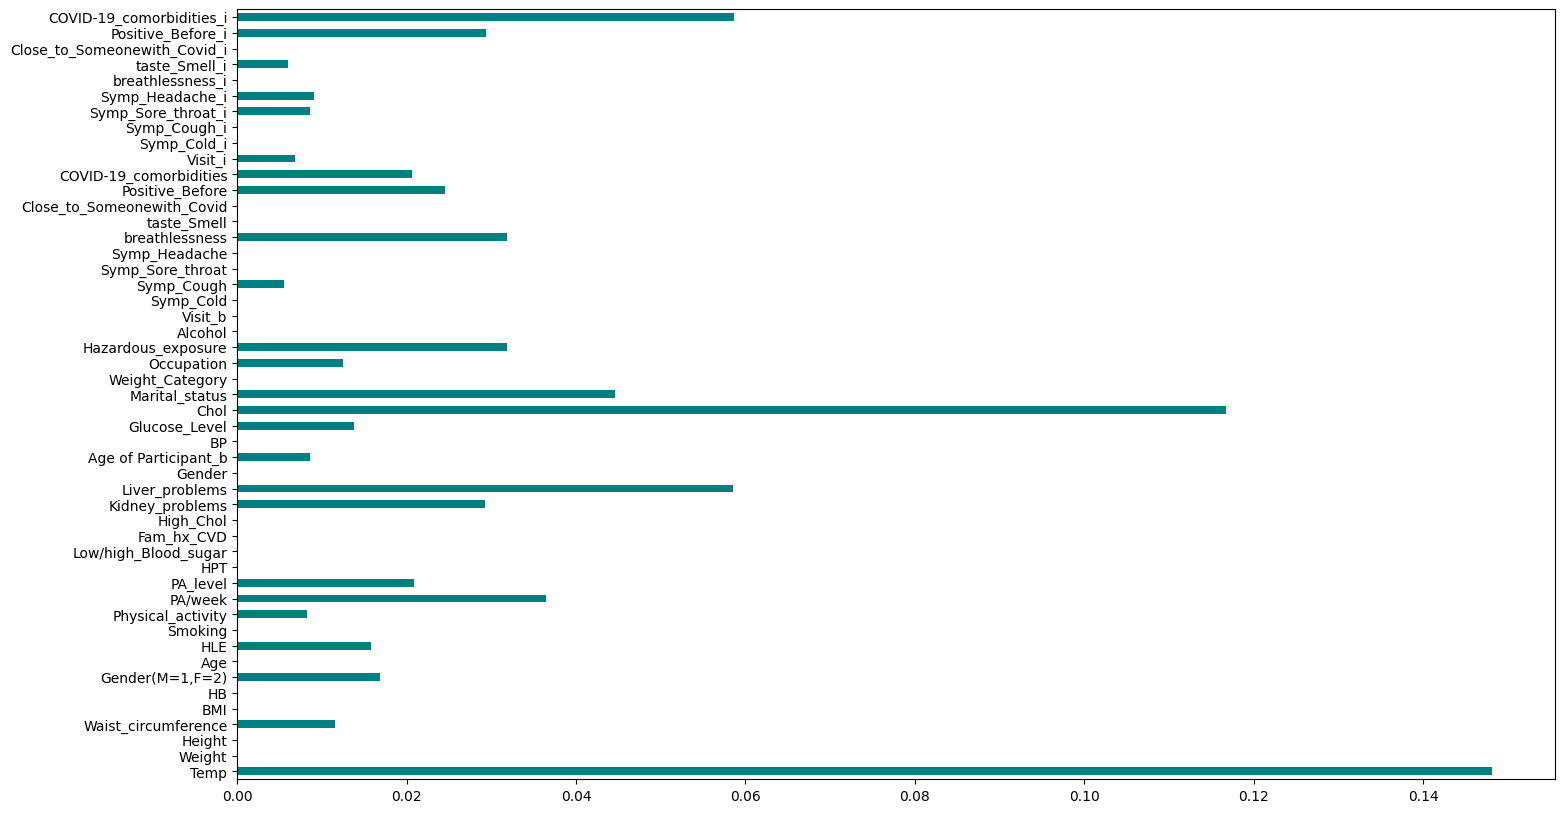

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances=mutual_info_classif(X,y)
feature_importance=pd.Series(importances,X.columns[0:len(data.columns)-1])
feature_importance.plot(kind='barh', color='teal')
plt.gcf().set_size_inches(17,10)
plt.show()

In [ ]:
# feature_importance.sort_values(ascending=False).head(50)

In [ ]:
Picked_IG=feature_importance[feature_importance>0.01]

In [ ]:
len(Picked_IG)

18

CHi-Square Test

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi2_features=SelectKBest(chi2,k=30)
picked_CHI=chi2_features.fit_transform(X,y)

In [ ]:
picked_CHI.shape

(257, 30)

Correlation

In [ ]:
import seaborn as sns

<Axes: >

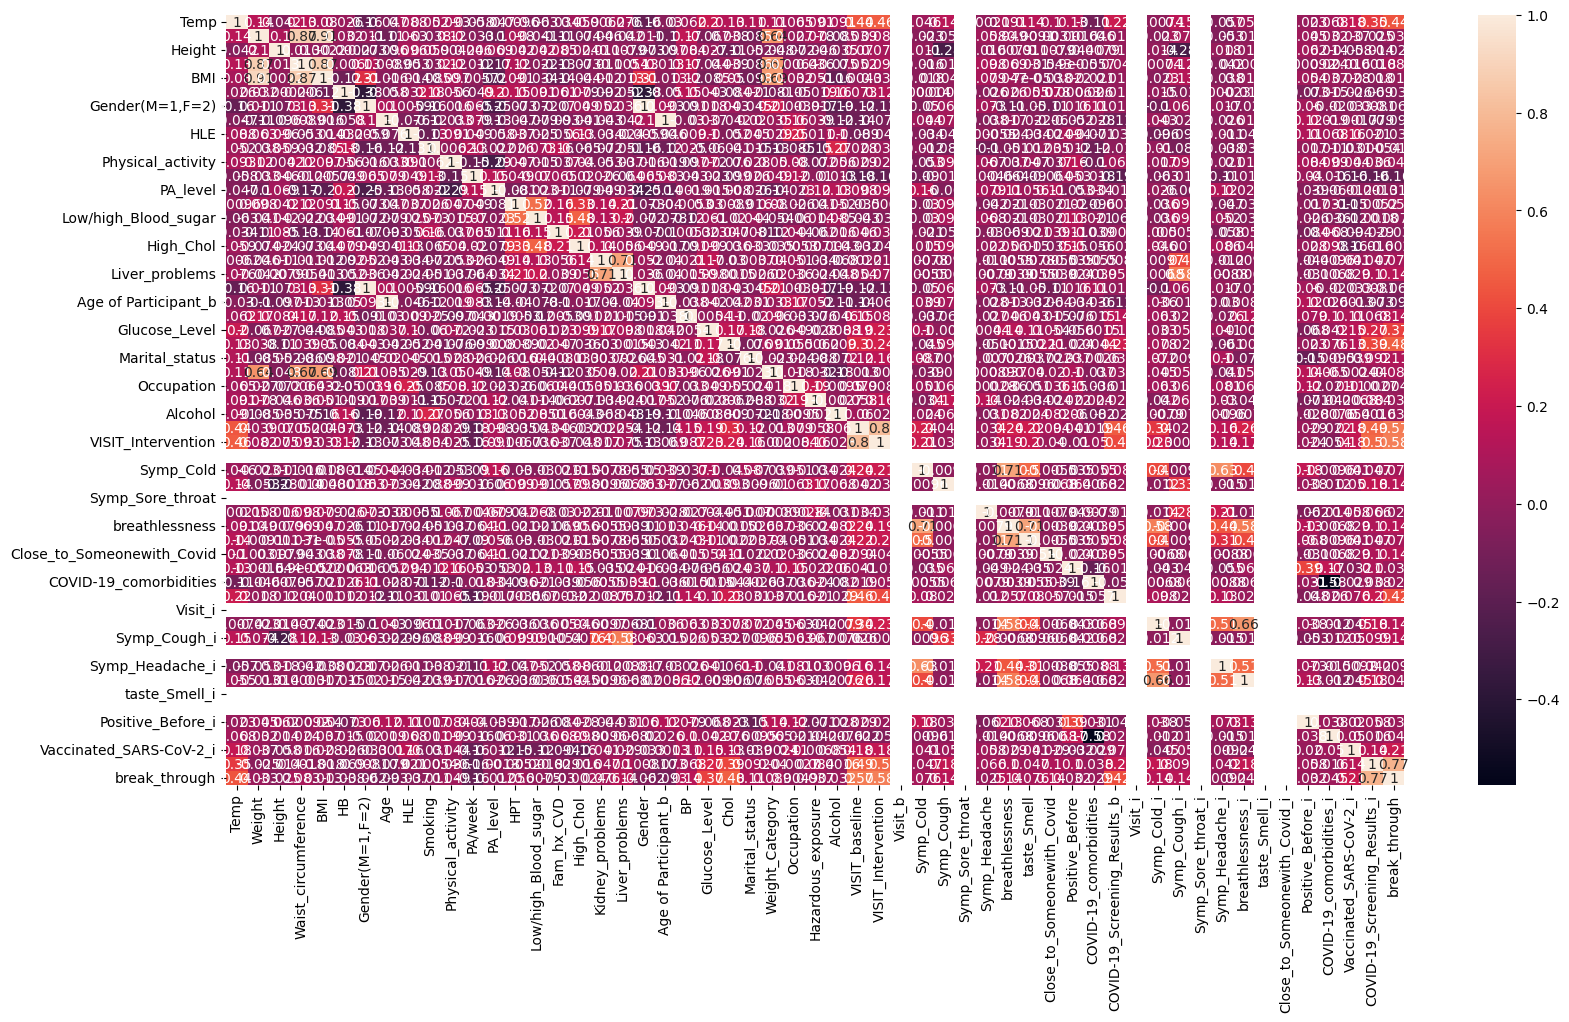

In [ ]:
plt.figure(figsize=(19,10))
sns.heatmap(corr_matrix,annot=True)

In [ ]:
picked_Corr=corr_matrix['break_through'].sort_values(ascending=False)

In [ ]:
picked_Corr=picked_Corr[picked_Corr>abs(0.050)]

In [ ]:
len(picked_Corr)

23

In [ ]:
picked_Features_Corr=picked_Corr.index

In [ ]:
picked_Features_Corr

Index(['break_through', 'COVID-19_Screening_Results_i', 'VISIT_Intervention',
       'VISIT_baseline', 'Chol', 'Temp', 'COVID-19_Screening_Results_b',
       'Glucose_Level', 'Vaccinated_SARS-CoV-2_i', 'BP', 'Symp_Cough_i',
       'Symp_Cough', 'Symp_Cold_i', 'Liver_problems',
       'Close_to_Someonewith_Covid', 'breathlessness', 'Marital_status',
       'Weight_Category', 'Waist_circumference', 'Kidney_problems',
       'taste_Smell', 'Symp_Cold', 'HPT'],
      dtype='object')

In [ ]:
Picked_IG.index

Index(['Temp', 'Waist_circumference', 'Gender(M=1,F=2)', 'HLE', 'PA/week',
       'PA_level', 'Kidney_problems', 'Liver_problems', 'Glucose_Level',
       'Chol', 'Marital_status', 'Occupation', 'Hazardous_exposure',
       'breathlessness', 'Positive_Before', 'COVID-19_comorbidities',
       'Positive_Before_i', 'COVID-19_comorbidities_i'],
      dtype='object')

In [ ]:
L=list(picked_Features_Corr)

In [ ]:
X_Corr=data[L]

In [ ]:
X_Corr.drop(['break_through','COVID-19_Screening_Results_b','COVID-19_Screening_Results_i',
             'Vaccinated_SARS-CoV-2_i','VISIT_baseline','VISIT_Intervention'],axis=1, inplace=True)

<ipython-input-111-c0976a0ca207>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Corr.drop(['break_through','COVID-19_Screening_Results_b','COVID-19_Screening_Results_i',


In [ ]:
X_Corr=data[['Temp','Chol','Glucose_Level','BP','Waist_circumference','Weight','BMI','HB','PA/week','Marital_status','Symp_Cold_i','Symp_Cough_i']]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaled=StandardScaler().fit_transform(X_Corr)
X_Corr=pd.DataFrame(scaled, columns=X_Corr.columns)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_Corr,y,random_state=42,stratify=y)

In [ ]:
Ytrain.value_counts()

0    158
1     34
Name: break_through, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
batch_size = 10
num_classes = 1
epochs = 100
import pickle

In [ ]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
!pip install tensorflow scikeras scikit-learn

In [ ]:

# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# Function to create model, required for Keras

# Training Models with Nested Cross Validation and Random Oversampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into train and test sets while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(X_Corr, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Print the original and resampled class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_resampled))

Original class distribution: [169  36]
Resampled class distribution: [169 169]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf
import pickle

### Training an MLP with Nested Cross-Validation with gridsearch and Random Oversampling

In [ ]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
  # create modeloptimizer=optimizer
  input_shape = (X_Corr.shape[1],)
  inputs = tf.keras.Input(shape=input_shape)
  input = tf.keras.layers.Dense((X_Corr.shape[1])+neurons, activation=activation)(inputs)
  x= tf.keras.layers.Dropout(dropout_rate)(input)
  second=tf.keras.layers.Dense((X_Corr.shape[1])+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(second)
  third=tf.keras.layers.Dense((X_Corr.shape[1])+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(third)
  fourth=tf.keras.layers.Dense((X_Corr.shape[1])+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(fourth)
  fifth=tf.keras.layers.Dense((X_Corr.shape[1])+neurons, activation=activation)(x)
# Add more hidden layers if necessary

# Add output layer with softmax activation
  outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(fifth)

# Create the model
  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return m


In [ ]:

# seed = 7
# tf.random.set_seed(seed)
# model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# dropout_rate = [0.3, 0.5]
# weight_constraint = [3.0, 5.0]
# neurons = [20]
# optimizer = ['SGD', 'Adam', 'RMSProp']
# activation = ['relu']
# param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
#                   model__neurons=neurons,model__activation=activation)
# outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')
# # Initialize lists to store outer fold results
# outer_scores = []
# best_models = []
# for train_idx, val_idx in outer_cv.split(X_train_resampled, y_train_resampled):
#     X_train_outer, X_val_outer = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
#     y_train_outer, y_val_outer = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]

#     # Perform hyperparameter tuning in the inner loop
#     grid_search.fit(X_train_outer, y_train_outer)
#     best_model = grid_search.best_estimator_
#     best_models.append(best_model)

#     # Evaluate the best model on the outer validation set
#     y_pred_outer = best_model.predict(X_val_outer)
#     accuracy = accuracy_score(y_val_outer, y_pred_outer)
#     outer_scores.append(accuracy)

# print("Outer CV Scores:", outer_scores)
# print("Mean Accuracy:", np.mean(outer_scores))
# print("Standard Deviation:", np.std(outer_scores))

# # Train the final model on the entire training set with the best hyperparameters
# final_best_model_mlp = grid_search.best_estimator_
# final_best_model_mlp.fit(X_train_resampled, y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)

# # Evaluate the final model on the holdout test set
# test_accuracy = final_best_model_mlp.score(Xtest, Ytest)
# print("Test Set Accuracy:", test_accuracy)

# # Compile the model
# # m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# # Train the model
# # m.fit(X_train_resampled, y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)

# # Evaluate the model and obtain predicted probabilities
# y_pred = final_best_model_mlp.predict(X_test)
# fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
# auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
# print("AUC:",auc_mlp)
# y_pred=np.round(final_best_model_mlp.predict(X_test)).ravel()
# print("\nCR by library method=\n",
#           classification_report(y_test, y_pred))
# print('The geometric mean is: {}'.format(geometric_mean_score(y_test, y_pred)))
# print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(y_test, y_pred)))
# # X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
# f = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models_for_production/MLP_Tensorflow.pkl'
# pickle.dump(final_best_model_mlp, open(f, 'wb'))

## Training XGBoost with Nested Cross-Validation with gridsearch and Random Oversampling

In [ ]:
# # Define your XGBoost classifier
# xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# # Define the hyperparameters you want to search over
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

# # Initialize the outer cross-validation
# outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Initialize the GridSearchCV for hyperparameter tuning (inner loop)
# inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=inner_cv, scoring='accuracy')

# # Initialize lists to store outer fold results
# outer_scores = []
# best_models = []

# # Outer cross-validation loop
# for train_idx, val_idx in outer_cv.split(X_train_resampled, y_train_resampled):
#     X_train_outer, X_val_outer = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
#     y_train_outer, y_val_outer = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]
#     # Perform hyperparameter tuning in the inner loop
#     grid_search.fit(X_train_outer, y_train_outer)
#     best_model = grid_search.best_estimator_
#     best_models.append(best_model)

#     # Evaluate the best model on the outer validation set
#     y_pred_outer = best_model.predict(X_val_outer)
#     accuracy = accuracy_score(y_val_outer, y_pred_outer)
#     outer_scores.append(accuracy)

# # Calculate and display the average and standard deviation of outer fold scores
# print("Outer CV Scores:", outer_scores)
# print("Mean Accuracy:", np.mean(outer_scores))
# print("Standard Deviation:", np.std(outer_scores))

# # Train the final model on the entire training set with the best hyperparameters
# final_best_model = grid_search.best_estimator_
# final_best_model.fit(X_train_resampled, y_train_resampled)

# # Evaluate the final model on the holdout test set
# test_accuracy = final_best_model.score(X_test, y_test)
# print("Test Set Accuracy:", test_accuracy)
# y_pred = final_best_model.predict(X_test)
# fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred)
# auc_xgb = round(metrics.roc_auc_score(y_test, y_pred), 4)
# print("AUC:",auc_xgb)
# y_pred=np.round(final_best_model.predict(X_test)).ravel()
# print("\nCR by library method=\n",
#           classification_report(y_test, y_pred))
# print('The geometric mean is: {}'.format(geometric_mean_score(y_test, y_pred)))
# print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(y_test, y_pred)))


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models_for_production/XGBoost.pkl'
# pickle.dump(final_best_model, open(filename, 'wb'))

In [ ]:
loaded = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models_for_production/XGBoost.pkl', 'rb'))
mlp = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models_for_production/MLP_Tensorflow.pkl', 'rb'))


### Performance

In [ ]:
y_pred = loaded.predict(X_test)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred)
auc_xgb = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_xgb)
y_pred=np.round(loaded.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))
print('The geometric mean is: {}'.format(geometric_mean_score(y_test, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(y_test, y_pred)))

AUC: 0.9767

CR by library method=
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.82      1.00      0.90         9

    accuracy                           0.96        52
   macro avg       0.91      0.98      0.94        52
weighted avg       0.97      0.96      0.96        52

The geometric mean is: 0.9764672918705589
The Matthews correlation coefficient is: 0.8832478983242993


In [ ]:
y_pred = mlp.predict(X_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(mlp.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))
print('The geometric mean is: {}'.format(geometric_mean_score(y_test, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(y_test, y_pred)))
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

AUC: 0.9767

CR by library method=
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.82      1.00      0.90         9

    accuracy                           0.96        52
   macro avg       0.91      0.98      0.94        52
weighted avg       0.97      0.96      0.96        52

The geometric mean is: 0.9764672918705589
The Matthews correlation coefficient is: 0.8832478983242993


In [ ]:
mlp.get_params()

{'model': <function __main__.create_model(dropout_rate, weight_constraint, neurons, activation)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': 10,
 'validation_batch_size': None,
 'verbose': 0,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 100,
 'model__activation': 'relu',
 'model__dropout_rate': 0.3,
 'model__neurons': 20,
 'model__weight_constraint': 3.0,
 'class_weight': None}

In [ ]:
encoder = ce.LeaveOneOutEncoder(cols=['BP_Average'])
encoder.fit(non_numeric[['BP_Average','Marital_status','Symp_Cold_i','Symp_Cough_i']], y)

LeaveOneOutEncoder(cols=['BP_Average'])

In [ ]:
X_Corr.shape[1]

12

In [ ]:
Xtrain.iloc[:,:].head()

,Temp,Chol,Glucose_Level,BP,Waist_circumference,Weight,BMI,HB,PA/week,Marital_status,Symp_Cold_i,Symp_Cough_i
21,0.999272,-0.024391,-1.264585,0.740123,0.912301,0.262603,0.339300,0.834201,0.289965,-0.490679,-0.109056,-0.108679
111,-1.053346,-0.993725,-0.023502,0.235899,0.180233,-0.675466,-0.204850,0.834201,0.289965,1.915675,-0.109056,-0.108679
139,-0.301615,1.774264,0.760547,0.740123,-0.285628,-0.519122,-0.204850,1.250491,-1.017420,0.042157,-0.109056,-0.108679
172,-0.059489,0.851601,-0.023502,-1.564737,1.844023,1.252786,1.835712,-0.830961,1.597349,0.042157,-0.109056,-0.108679
134,1.213256,-0.993725,0.760547,1.872335,-1.417005,-0.988156,-1.565225,0.834201,-1.017420,0.042157,-0.109056,-0.108679


### Testing which model performs better when some features has null values

In [ ]:
Xtrain_8_features = Xtrain.iloc[:4, :8]

Xtrain_12_features = np.hstack((Xtrain_8_features, np.zeros((Xtrain_8_features.shape[0], 4))))

# Now you can use the KerasClassifier model to predict using the Xtrain_12_features data
predictions = mlp.predict(Xtrain_12_features)

In [ ]:
predictions

array([0, 0, 1, 0])

In [ ]:
mlp.predict(Xtrain.iloc[:4,:])

array([0, 0, 1, 0])

In [ ]:
Ytrain.iloc[:4]

21     0
111    0
139    0
172    0
Name: break_through, dtype: int64

In [ ]:
loaded.predict(Xtrain_12_features)

array([0, 0, 0, 0])

In [ ]:
loaded.predict(Xtrain.iloc[:4,:])

array([0, 0, 0, 0])

In [ ]:
np.array(X_test.iloc[0,:])

array([ 0.34616662, -0.99372502, -0.55578835,  0.74012288, -0.1525249 ,
        0.2626025 , -0.61296264,  0.41791036,  0.28996465,  0.04215689,
       -0.10905566, -0.10867853])

In [ ]:
mlp.predict(np.array(X_test.iloc[0,:]).reshape(1,-1))

array([0])

In [ ]:
y_test.iloc[0]

0

In [ ]:
X_test_with_nulls=np.array([0.34616662, np.nan, -0.55578835,  0.74012288, -0.1525249 ,
        0.2626025 , np.nan,  0.41791036,  np.nan,  0.04215689,
       -0.10905566, np.nan])

In [ ]:
X_test_with_nulls = np.nan_to_num(X_test_with_nulls, nan=0)

# Predict using the model
mlp.predict(X_test_with_nulls.reshape(1,-1))

array([0])

In [ ]:
loaded.predict(X_test_with_nulls.reshape(1,-1))

array([0])

In [ ]:
y_test.iloc[1]

1

In [ ]:
np.array(X_test.iloc[0,:])

array([ 0.34616662, -0.99372502, -0.55578835,  0.74012288, -0.1525249 ,
        0.2626025 , -0.61296264,  0.41791036,  0.28996465,  0.04215689,
       -0.10905566, -0.10867853])

In [ ]:
X_test_with_nulls=np.array([ 0.34616662, np.nan, -0.55578835,  0.74012288, -0.1525249 ,
        np.nan , -0.61296264,  0.41791036,  np.nan,  0.04215689,
       -0.10905566, np.nan])

In [ ]:
X_test_with_nulls = np.nan_to_num(X_test_with_nulls, nan=0)

# Predict using the model
mlp.predict(X_test_with_nulls.reshape(1,-1))

array([0])

In [ ]:
loaded.predict(X_test_with_nulls.reshape(1,-1))

array([0])

In [ ]:
loaded.predict(np.array(X_test.iloc[0,:]).reshape(1,-1))

array([0])

In [ ]:
mlp.predict(np.array(X_test.iloc[0,:]).reshape(1,-1))

array([0])

## Functions for data preprocessing

In [ ]:
def categories_BP(s):
  Systolic, diastolic= s[0],s[1]
  # return num, denom
  if((Systolic<=120) and (diastolic<80)):
    return 'Normal'
  elif((Systolic>=120 and Systolic<=129) and (diastolic<80)):
    return 'Optimal'
  elif((Systolic>=130 and Systolic<=139) or (diastolic>=80 and diastolic<=89)):
    return 'High Normal'
  elif((Systolic>=140 and Systolic<=159) or (diastolic>=90 and diastolic<=99)):
    return 'Mild_Hypertension'
  elif((Systolic>=160 and Systolic<=179) or (diastolic>=100 and diastolic<=109)):
    return 'Moderate_Hypertension'
  elif((Systolic>=180) or (diastolic>=110)):
    return 'Severe_Hypertension'
  elif((Systolic>=140) and (diastolic<90)):
    return 'Isolated Systolic'
  else:
    return 'Out of Range'

In [ ]:
def receive_nine_values():
    values = []
    data=['Temperature', 'Cholestrol', 'Glucose Level', 'Waist Circumference', 'Weight','BMI', 'Hemoglobin Level', 'Physical activity per week']
    data_non_num=['BP Systolic', 'BP Diastolic','Marital_status','Symp_Cold_i','Symp_Cough_i']
    non_num_values=[]
    for i in range(len(data)):
      print('Enter {} value'.format(data[i]))
      value = float(input("Enter value for {}: ".format(i+1)))
      values.append(value)
    scaled=list(StandardScaler().fit_transform(np.array(values).reshape(-1, 1)))
    for i in range(len(data_non_num)):
      print('Enter {} value'.format(data_non_num[i]))
      value = float(input("Enter value for {}: ".format(i+1)))
      non_num_values.append(value)
    categories=non_num_values[:2]
    bp_cate= encoder.transform(pd.Series(list(categories_BP(categories)), name='BP_Average')).iloc[0,0]
    scaled.insert(3,bp_cate)
    return scaled

In [ ]:
def break_through(model,user_data):
  extracted_data = [item[0] if isinstance(item, np.ndarray) and item.ndim > 0 else item for item in user_data]
  proper_float_values = []
  for item in extracted_data:
    if isinstance(item, np.ndarray) and item.ndim == 0:  # Handle 0-dimensional arrays
        proper_float_values.append(float(item))
    elif isinstance(item, (int, float)):  # Handle scalars
        proper_float_values.append(float(item))
    else:
        raise ValueError(f"Unsupported data type: {type(item)}")
  predicted=model.predict(np.array(proper_float_values).reshape(1, -1))
  if(np.round(predicted)==0):
    print('The user is not likely to be infected again with a probability of {}'.format(predicted))
  elif(np.round(predicted)==1):
    print('The user is likely to be infected again with a probability of {}'.format(predicted))

In [ ]:
data=receive_nine_values()

In [ ]:
break_through(loaded, data)